In [7]:
import os 
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


In [13]:
from dataset import SpritesDataset
from models import beta_vae
import torch
import torch.utils.data
epochs = 10
dataset = SpritesDataset('../data','dsprites-dataset','data.npz')



In [14]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 4, shuffle = True, num_workers =1)


tensor([[ 0.,  2.,  5., 33., 21., 12.],
        [ 0.,  2.,  2., 38., 14.,  8.],
        [ 0.,  2.,  0., 11., 11.,  4.],
        [ 0.,  1.,  5., 11., 26.,  8.]])
tensor([[1.0000, 3.0000, 1.0000, 5.3165, 0.6774, 0.3871],
        [1.0000, 3.0000, 0.7000, 6.1221, 0.4516, 0.2581],
        [1.0000, 3.0000, 0.5000, 1.7722, 0.3548, 0.1290],
        [1.0000, 2.0000, 1.0000, 1.7722, 0.8387, 0.2581]])


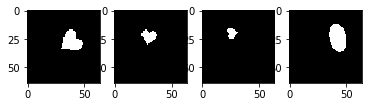

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
imgs,latent_classes, latent_values = next(iter(dataloader))
fig,axs = plt.subplots(1,4)
for i in range(len(imgs)):
    axs[i].imshow(imgs[i], cmap = 'gray')
print(latent_classes)
print(latent_values)

In [30]:
import numpy as np
root_dir = '../data'
dataset_dir = 'dsprites-dataset'
filename = 'data.npz'
data = np.load(os.path.join(root_dir, dataset_dir,filename), encoding = 'latin1')

imgs = data['imgs']
latent_classes = data['latents_classes']
latent_values = data['latents_values']
metadata = data['metadata'][()]

latents_sizes = metadata['latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                        np.array([1,])))

In [42]:
metadata['latents_sizes'][::-1

array([32, 32, 40,  6,  3,  1])

In [44]:
latents_sizes = metadata['latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))

In [45]:
latents_bases

array([737280, 245760,  40960,   1024,     32,      1])

In [84]:
def random_sample(size = 1):
    a = np.zeros((size, latents_sizes.size))
    for lat_i, lat_size in enumerate(latents_sizes):
        a[:, lat_i] = np.random.randint(lat_size,size = size)
    return a

def latent_to_ix(latents):
    return np.dot(latents,latents_bases).astype(int)

In [85]:
random_sample(1)

array([[ 0.,  0.,  4., 37., 22., 10.]])

In [86]:
ix = latent_to_ix(random_sample(1))

(1, 64, 64)

TypeError: Invalid dimensions for image data

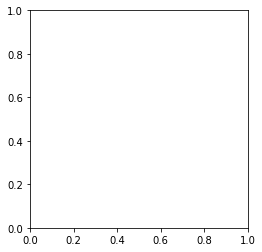